In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

os.environ['PYTHONHASHSEED'] = '0'

np.random.seed(12345)


#session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

#from keras import backend as K

#tf.set_random_seed(0)

#sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
#K.set_session(sess)



/Users/daichisato/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from keras import backend as K
K.set_learning_phase(0)

Using TensorFlow backend.


In [3]:
import pandas as pd
# それぞれの画像について腫瘍情報のテーブルを作る
#UT007に関してはもう一度みる必要あり
pic_info = pd.DataFrame({
                    'patient_id' :        ['UT001', 'UT001', 'UT001', 'UT010', 'UT010', 'UT010',  'UT010', 'UT003', 'UT003', 'UT003', 'UT007', 'UT007', 'UT007', 'UT008', 'UT008', 'UT008', 'UT009', 'UT009', 'UT009','UT011','UT011','UT011'],
                    'patient_sub_height': [  '100',   '200',   '300',   '900',  '1000',  '1100',   '1200',  '1300',  '1400',  '1500',   '700',   '800',   '900',   '600',   '700',   '800',  '1500',  '1600',  '1700',  '600',  '700',  '800'],
                    'patient_sub_speed':  [ '1480',  '1480',  '1480',  '1510',  '1510',  '1510',   '1510',  '1480',  '1480',  '1480',  '1523',  '1523',  '1523',  '1521',  '1521',  '1521',  '1518',  '1518',  '1518', '1523', '1523', '1523'],
                    'tumor_left_x' :      [    195,     201,     198,     310,     310,     310,     310,      295,     290,    290,      180,     200,     195,     200,     200,     200,     132,     132,     127,    170,   175,     172],
                    'tumor_upper_y' :     [    205,     208,     200,     225,     225,     225,     230,      300,     298,    300,      230,     250,     240,     220,     220,     220,     270,     270,     270,    245,   250,     253],
                    'tumor_width' :       [     50,      50,      50,      70,      50,      45,      45,       50,      50,     50,       80,      60,      70,      70,      70,      70,      50,      50,      50,     55,    55,      45],
                    'tumor_height' :      [     45,      45,      45,      45,      70,      50,      50,       35,      30,     40,       80,      60,      70,      40,      40,      40,      55,      55,      55,     55,    55,      45],
                    'default_left_x' :    [    100,     100,     100,     150,    150,      150,     150,      100,     100,    100,      100,     100,     100,     100,     100,     100,     100,     100,      100,    100,   100,    100],
                    'default_upper_y' :   [    100,     100,     100,     100,    100,      100,     100,      100,     100,    100,      200,     200,     200,     100,     100,     100,     100,     100,      100,    100,   100,    100],
                    'max_left_x' :        [    340,     340,     340,     340,    340,      340,     340,      340,     340,    340,      220,     220,     220,     340,     340,     340,     340,     340,      340,    250,   250,    250],
                    'max_upper_y' :       [    340,     340,     340,     340,    340,      340,     340,      340,     340,    340,      280,     280,     280,     240,     340,     340,     340,     340,      340,    300,   300,    300],
                    'file_path' : ['./data/all_data/tumor/P_UT001_20161226_153444_100_speed1480_GCF010_comp8.bmp',
                                   './data/all_data/tumor/P_UT001_20161226_153500_200_speed1480_GCF010_comp8.bmp',
                                   './data/all_data/tumor/P_UT001_20161226_153514_300_speed1480_GCF010_comp8.bmp',
                                   './data/all_data/tumor/N_UT010_20170428_141903_900_speed1510_GCF10_comp8_max02.bmp',
                                   './data/all_data/tumor/N_UT010_20170428_141918_1000_speed1510_GCF10_comp8_max02.bmp',
                                   './data/all_data/tumor/N_UT010_20170428_141932_1100_speed1510_GCF10_comp8_max02.bmp',
                                   './data/all_data/tumor/N_UT010_20170428_141946_1200_speed1510_GCF10_comp8_max02.bmp',
                                   './data/all_data/tumor/UT003_20170120_155150_1300_speed1480_GCF10_comp8.bmp',
                                   './data/all_data/tumor/UT003_20170120_155205_1400_speed1480_GCF10_comp8.bmp',
                                   './data/all_data/tumor/UT003_20170120_155219_1500_speed1480_GCF10_comp8.bmp',
                                   './data/all_data/tumor/UT007_20170303_120722_700_speed1523.985_gcf10_comp8_1490_binarySpeed.bmp',
                                   './data/all_data/tumor/UT007_20170303_120736_800_speed1523.985_gcf10_comp8_1490_binarySpeed.bmp',
                                   './data/all_data/tumor/UT007_20170303_120750_900_speed1523.985_gcf10_comp8_1490_binarySpeed.bmp',
                                   './data/all_data/tumor/N_UT_008_20170407_144338_600_speed1521.935_gcf10_comp8_1400_binarySpeed.bmp',
                                   './data/all_data/tumor/N_UT_008_20170407_144352_700_speed1521.935_gcf10_comp8_1400_binarySpeed.bmp',
                                   './data/all_data/tumor/N_UT_008_20170407_144407_800_speed1521.935_gcf10_comp8_1400_binarySpeed.bmp',
                                   './data/all_data/tumor/UT009_20170421_135409_1500_speed1518.414_gcf10_comp8_1395_binarySpeed.bmp',
                                   './data/all_data/tumor/UT009_20170421_135424_1600_speed1518.414_gcf10_comp8_1395_binarySpeed.bmp',
                                   './data/all_data/tumor/UT009_20170421_135438_1700_speed1518.414_gcf10_comp8_1395_binarySpeed.bmp',
                                   './data/all_data/tumor/UT011_20170512_141428_600_speed1523.434_gcf10_comp8_1460_binarySpeed.bmp',
                                   './data/all_data/tumor/UT011_20170512_141441_700_speed1523.434_gcf10_comp8_1460_binarySpeed.bmp',
                                   './data/all_data/tumor/UT011_20170512_141455_800_speed1523.434_gcf10_comp8_1460_binarySpeed.bmp',]
                    }, index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [4]:
from patch_func import patch

x_y_label = patch(pic_info, 100, 100, 10)

In [5]:
from data_making import mk_data

Y_test, X_train, x_test, y_test, val_x_train, val_y_train, val_x_test, val_y_test = mk_data(x_y_label,"UT001")

In [6]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = X_train.shape[1:]
                 )

In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

### 最後のConvolution（block5）は学習するようにする

In [8]:
conv_base.trianble = True

set_trianble = False
for layer in conv_base.layers :
        if layer.name == 'block5_conv1' :
                set_trianble = True
        if set_trianble :
            layer.trianble = True
        else :
            layer.trianble = False

In [9]:
import keras
from keras import models, layers, optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(2, activation = 'sigmoid'))

In [10]:
import keras
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

def keras_cnn_fit(loss, optimizer, batch, epoch, Y_test, x_test, y_test, val_x_train, val_y_train, val_x_test, val_y_test):
    
    x_test = x_test
    Y_test = Y_test
    
    model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    #　Tensor Boardのcallbackを作成
    from keras.callbacks import TensorBoard
    tbcb = TensorBoard(log_dir = './graph',
                     histogram_freq = 0, write_graph = True)

    # historyに学習履歴を取得
    es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')

    history = model.fit(val_x_train, val_y_train, batch_size=batch, epochs=epoch,
                       validation_data = (val_x_test, val_y_test), verbose=1,
                       callbacks = [tbcb])


    # モデルの保存
    #from keras.models import model_from_json
    #model_json=model.to_json()
    #with open("model.json",mode='w') as f:
    #    f.write(model_json)
    
    # 学習済みの重みを保存
    #model.save_weights("weights.hdf5")

    # 学習履歴を保存
    #import pickle
    #with open("history.pickle",mode='wb') as f:
    #    pickle.dump(history.history,f)
    
    score = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    #Accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    #loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    classes = model.predict_classes(x_test)

    confmat = confusion_matrix(y_true=Y_test, y_pred=classes)
    test_seikai_label = (np.argmax(y_test,axis = 1) ).reshape(-1,1)
    print(confmat)
    print('accuracy : ', accuracy_score(Y_test, classes))
    print('recall: ', recall_score(Y_test, classes))

    return test_seikai_label, x_test, Y_test, classes

### UT001

In [11]:
#モデルのパラメータ
n_filter = 32
n_filter2 = 64
n_filter3 = 128

size_filter1 = 3
size_filter = 3
size_pool = 2

n_hidden = 512
n_label = 2

#コンパイル時のパラメータ
loss='binary_crossentropy'
optimizer = optimizers.RMSprop(lr=1e-5)
batch = 64
epoch = 5

from data_making import mk_data
Y_test, X_train, x_test, y_test, val_x_train, val_y_train, val_x_test, val_y_test = mk_data(x_y_label,"UT001")

print('model')
print(model.summary())


model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 15,895,106
Trainable params: 15,895,106
Non-trainable params: 0
_________________________________________________________________
None


Train on 498 samples, validate on 498 samples
Epoch 1/5
498/498 [==============================] - 462s 928ms/step - loss: 0.6448 - acc: 0.6586 - val_loss: 0.5241 - val_acc: 0.8153
Epoch 2/5
498/498 [==============================] - 524s 1s/step - loss: 0.4217 - acc: 0.8594 - val_loss: 0.3305 - val_acc: 0.8986
Epoch 3/5
498/498 [==============================] - 579s 1s/step - loss: 0.3677 - acc: 0.8474 - val_loss: 0.2775 - val_acc: 0.9036
Epoch 4/5
498/498 [==============================] - 489s 982ms/step - loss: 0.2225 - acc: 0.9408 - val_loss: 0.2590 - val_acc: 0.8956
Epoch 5/5
498/498 [==============================] - 494s 993ms/step - loss: 0.2141 - acc: 0.9287 - val_loss: 0.1944 - val_acc: 0.9287
Test loss: 1.316940106013242
Test accuracy: 0.4941176456563613


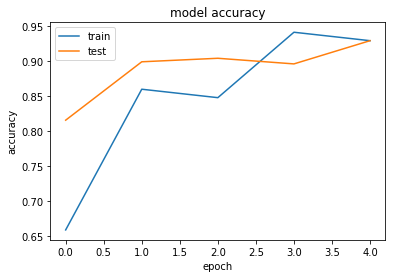

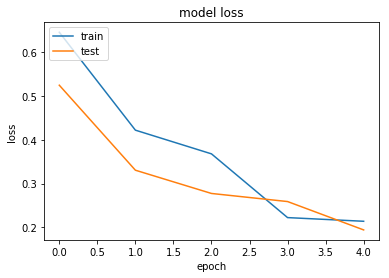

[[74 11]
 [73 12]]
accuracy :  0.5058823529411764
recall:  0.1411764705882353


In [12]:
test_seikai_label, x_test, Y_test, classes = keras_cnn_fit(loss, optimizer, batch, epoch, Y_test, x_test, y_test, val_x_train, val_y_train, val_x_test, val_y_test)

### UT010

Train on 475 samples, validate on 475 samples
Epoch 1/5
475/475 [==============================] - 524s 1s/step - loss: 0.3802 - acc: 0.8537 - val_loss: 0.1994 - val_acc: 0.9189
Epoch 2/5
475/475 [==============================] - 645s 1s/step - loss: 0.1888 - acc: 0.9274 - val_loss: 0.1596 - val_acc: 0.9411
Epoch 3/5
475/475 [==============================] - 592s 1s/step - loss: 0.1179 - acc: 0.9558 - val_loss: 0.1592 - val_acc: 0.9326
Epoch 4/5
475/475 [==============================] - 573s 1s/step - loss: 0.1518 - acc: 0.9453 - val_loss: 0.1175 - val_acc: 0.9484
Epoch 5/5
475/475 [==============================] - 488s 1s/step - loss: 0.0823 - acc: 0.9811 - val_loss: 0.3099 - val_acc: 0.8674
Test loss: 1.3112834886371814
Test accuracy: 0.5509259259259259


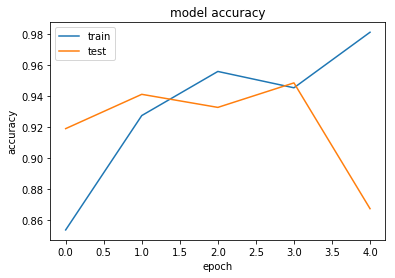

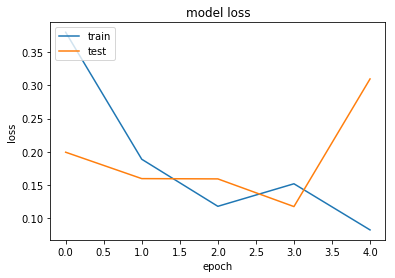

[[108   0]
 [ 98  10]]
accuracy :  0.5462962962962963
recall:  0.09259259259259259


In [13]:
#モデルのパラメータ
n_filter = 32
n_filter2 = 64
n_filter3 = 128

size_filter1 = 3
size_filter = 3
size_pool = 2

n_hidden = 512
n_label = 2

#コンパイル時のパラメータ
loss='binary_crossentropy'
optimizer = optimizers.RMSprop(lr=1e-5)
batch = 64
epoch = 5

from data_making import mk_data
Y_test, X_train, x_test, y_test, val_x_train, val_y_train, val_x_test, val_y_test = mk_data(x_y_label,"UT010")

test_seikai_label, x_test, Y_test, classes = keras_cnn_fit(loss, optimizer, batch, epoch, Y_test, x_test, y_test, val_x_train, val_y_train, val_x_test, val_y_test)

Train on 475 samples, validate on 475 samples
Epoch 1/5
475/475 [==============================] - 690s 1s/step - loss: 0.1295 - acc: 0.9495 - val_loss: 0.0792 - val_acc: 0.9737
Epoch 2/5
475/475 [==============================] - 581s 1s/step - loss: 0.0762 - acc: 0.9716 - val_loss: 0.0652 - val_acc: 0.9726
Epoch 3/5
475/475 [==============================] - 440s 926ms/step - loss: 0.0495 - acc: 0.9863 - val_loss: 0.0492 - val_acc: 0.9863
Epoch 4/5
475/475 [==============================] - 526s 1s/step - loss: 0.0311 - acc: 0.9937 - val_loss: 0.0534 - val_acc: 0.9758
Epoch 5/5
475/475 [==============================] - 491s 1s/step - loss: 0.0233 - acc: 0.9947 - val_loss: 0.0459 - val_acc: 0.9842
Test loss: 1.2849100392173838
Test accuracy: 0.6412037059112832


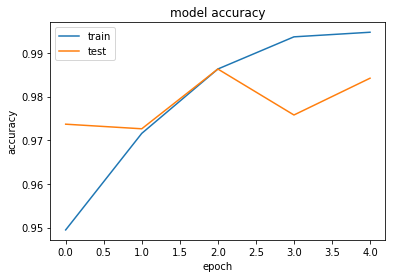

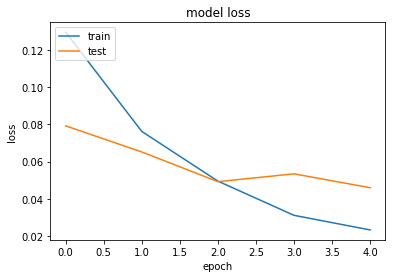

[[101   7]
 [ 71  37]]
accuracy :  0.6388888888888888
recall:  0.3425925925925926


In [14]:
#モデルのパラメータ
n_filter = 32
n_filter2 = 64
n_filter3 = 128

size_filter1 = 3
size_filter = 3
size_pool = 2

n_hidden = 512
n_label = 2

#コンパイル時のパラメータ
loss='binary_crossentropy'
optimizer = optimizers.Adam(lr=1e-5)
batch = 64
epoch = 5

from data_making import mk_data
Y_test, X_train, x_test, y_test, val_x_train, val_y_train, val_x_test, val_y_test = mk_data(x_y_label,"UT010")

test_seikai_label, x_test, Y_test, classes = keras_cnn_fit(loss, optimizer, batch, epoch, Y_test, x_test, y_test, val_x_train, val_y_train, val_x_test, val_y_test)

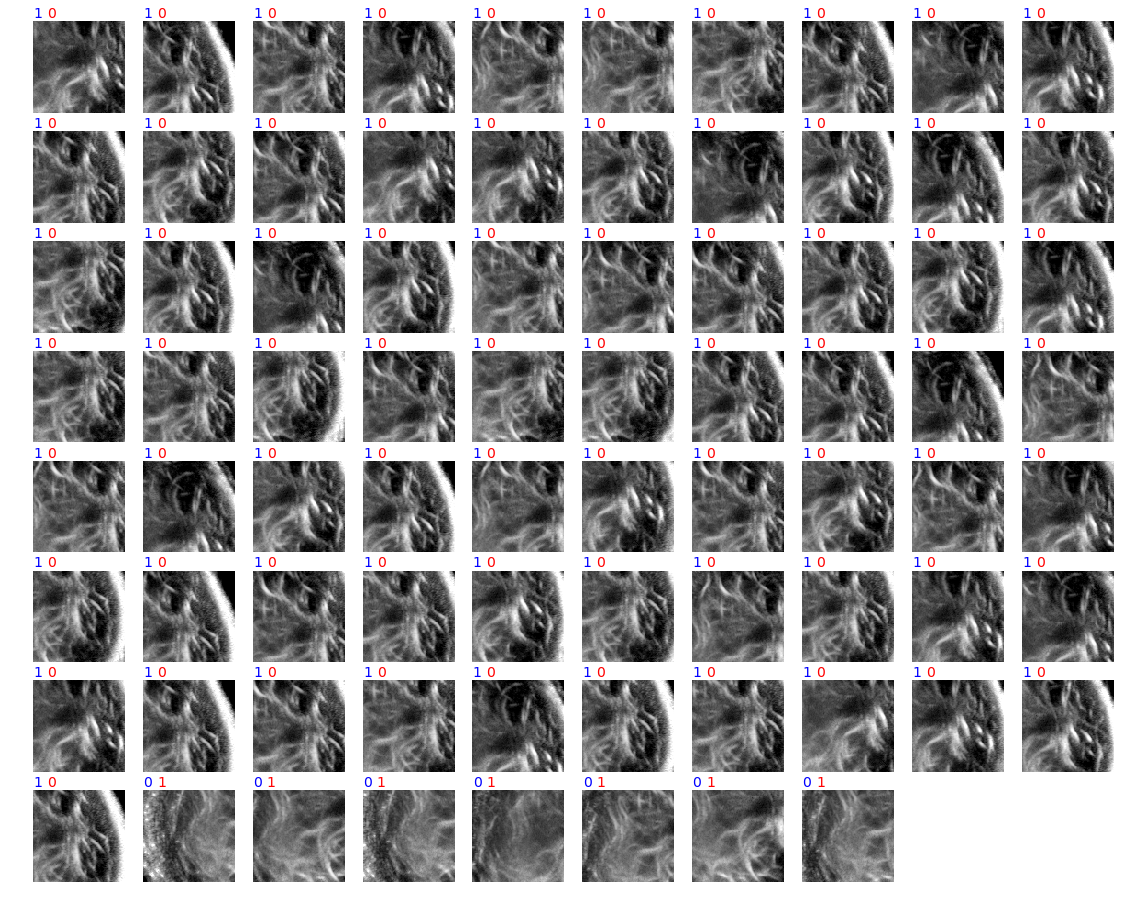

In [15]:
from misclassification import check_misclassification_image

check_misclassification_image(test_seikai_label, x_test, Y_test, classes)